In [1]:
%matplotlib inline
%load_ext signature

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import helpers

# Set style and meta info.
mpl.style.use('ramiro')

chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: Reddit /u/Stuck_In_the_Matrix & /u/fhoffa - reddit.com'
infosize = 12

df = pd.read_csv('csv/reddit_comments_201505_gilded_comments.csv')
df.head()

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class
0,Even more reason to go suck it\n,False,False,t1_crraphe,BoogieKing,Seattle Sounders,0,1433115464,t5_2rbnb,t3_37zxin,t1_crrakgo,5,1433505594,0,1,crraphe,MLS,5,NaN,seattle-sounders
1,"I'm Sikh, I spent some time yesterday talking ...",False,False,t1_crraqoo,Qweef,NaN,0,1433115527,t5_2qh33,t3_3803l7,t1_crraezp,318,1433505607,0,1,crraqoo,funny,318,NaN,NaN
2,I had a blast with it https://www.youtube.com/...,False,False,t1_crras65,Skylent,NaN,0,1433115604,t5_2s2ul,t3_37rgak,t3_37rgak,2,1433505625,0,1,crras65,AndroidGaming,2,NaN,NaN
3,&gt; using this as segue into talking to our k...,False,False,t1_crrau1p,StandardToaster895,St. Louis Cardinals,0,1433115706,t5_2qm7u,t3_37zzky,t1_crr6t5q,-13,1433505650,1,1,crrau1p,baseball,-13,NaN,stl
4,&gt;Who are our world leaders?\nI think it sho...,False,False,t1_crrauyi,Nomenimion,NaN,0,1433115752,t5_2t7no,t3_380ke7,t3_380ke7,5,1433505662,0,1,crrauyi,Futurology,5,NaN,NaN


In [20]:
comment_texts = df.body.str.cat(sep=' ')

In [21]:
len(comment_texts)

11009502

In [22]:
import re

def tokens(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[a-z]+', text.lower()) 

words = tokens(comment_texts)

In [26]:
len(words)

1982567

In [27]:
import random

def sample(bag, n=10):
    "Sample a random n-word sentence from the model described by the bag of words."
    return ' '.join(random.choice(bag) for _ in range(n))

sentence = sample(words)
sentence

'our any rather my way i punished it sure rsingapore'

In [30]:
from collections import Counter

counts = Counter(words)
counts.most_common(10)

[('the', 79050),
 ('to', 52863),
 ('and', 47530),
 ('a', 46259),
 ('i', 42879),
 ('of', 36653),
 ('you', 33002),
 ('it', 28871),
 ('that', 27195),
 ('in', 25512)]

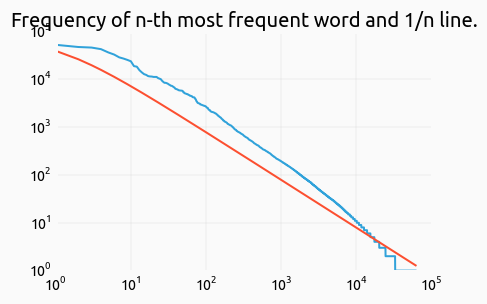

In [36]:
max_count = counts['the']

plt.yscale('log')
plt.xscale('log')
plt.title('Frequency of n-th most frequent word and 1/n line.')

plt.plot([c for (w, c) in counts.most_common()])
plt.plot([max_count / i for i in range(1, len(counts) + 1)]);